In [3]:
import torch
from torch import nn
from torchvision.models import vgg16
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
#Testing filter visualization with gradient ascent
model = vgg16(pretrained=True)
model.eval()

generated_image = torch.randn(1, 3, 224, 224, requires_grad=True)
optimizer = torch.optim.Adam([generated_image], lr = 0.1)
l2_lambda = 0.01
target_class = 285

for i in range(1000):
    optimizer.zero_grad()

    scores = model(generated_image)
    scores_c = scores[0, target_class]

    l2_penalty = l2_lambda * torch.norm(generated_image, 2)
    loss = -scores_c + l2_penalty
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

Iteration 0, Loss: 5.229012966156006
Iteration 10, Loss: -73.16232299804688
Iteration 20, Loss: -190.24757385253906
Iteration 30, Loss: -335.887939453125
Iteration 40, Loss: -498.43780517578125
Iteration 50, Loss: -680.6694946289062
Iteration 60, Loss: -875.94189453125
Iteration 70, Loss: -1080.62255859375
Iteration 80, Loss: -1294.0042724609375
Iteration 90, Loss: -1513.0089111328125
Iteration 100, Loss: -1737.57470703125
Iteration 110, Loss: -1967.49658203125
Iteration 120, Loss: -2200.505126953125
Iteration 130, Loss: -2437.565185546875
Iteration 140, Loss: -2675.000732421875
Iteration 150, Loss: -2914.22607421875
Iteration 160, Loss: -3153.7861328125
Iteration 170, Loss: -3394.663330078125
Iteration 180, Loss: -3637.84326171875
Iteration 190, Loss: -3882.558837890625
Iteration 200, Loss: -4130.2646484375
Iteration 210, Loss: -4379.88525390625
Iteration 220, Loss: -4631.115234375
Iteration 230, Loss: -4882.87451171875
Iteration 240, Loss: -5135.45166015625
Iteration 250, Loss: -5389

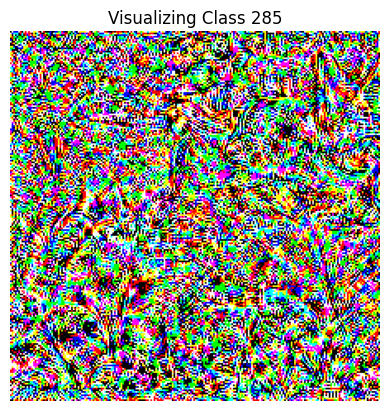

In [20]:

img_vis = generated_image.detach().cpu().squeeze().numpy()
img_vis = img_vis.transpose(1, 2, 0)

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img_vis = std * img_vis + mean 

# 3. Clip the values so they are valid pixel values [0, 1]
img_vis = np.clip(img_vis, 0, 1)

# 4. Display the "Ideal" Class Image
plt.imshow(img_vis)
plt.title(f"Visualizing Class {target_class}")
plt.axis("off")
plt.show()

In [ ]:
#Visualizing the filter by gradient ascent but based on the specific layer
